In [2]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

import json, glob, os
import numpy as np
import matplotlib.pyplot as plt


In [10]:
%matplotlib widget

In [3]:
import utils.load_grid as lg

In [4]:
def read_json(fpath):
    with open(fpath) as hdl:
        data = json.load(hdl)
    
    out = {}
    for k in data["data"].keys():
        arr = [float(v) for v in data["data"][k]["values"]]
        out[k] = np.array(arr, dtype=float) * float(data["data"][k]["scaling"])
    out["time"] = float(data["time_years"])
    return out

In [5]:
case_dir = "data/article_data/jgr_proteus_grid/fiducial/"

In [6]:
years = lg.get_json_years(case_dir)
files = [case_dir+"data/%d.json"%y for y in years]
jsons = [read_json(f) for f in files]
nfiles = len(years)

Text(0.5, 1.0, 'Level = 10')

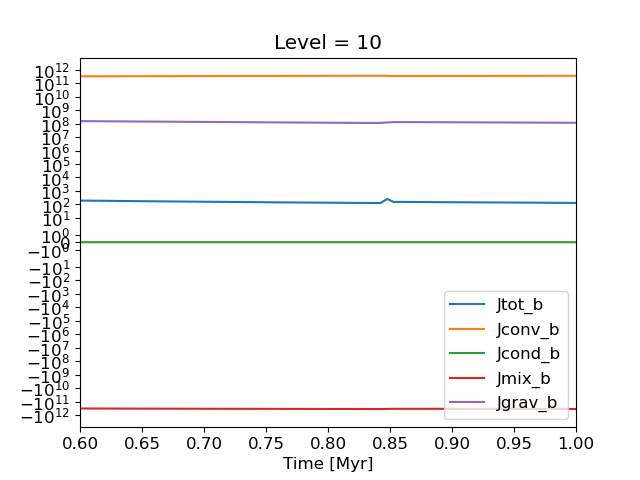

In [11]:
lvl = 10
keys = ["Jtot_b","Jconv_b","Jcond_b","Jmix_b","Jgrav_b"]
ys = {}
for k in keys:
    ys[k] = []
t = []

for i in range(nfiles):
    dat = jsons[i]
    t.append(dat["time"]/1e6)
    for k in keys:
        ys[k].append(dat[k][lvl])


fig,ax = plt.subplots(1,1)
for k in keys:
    ax.plot(t,ys[k], label=k)

ax.set_yscale("symlog")
ax.legend(loc="lower right")

ax.set_xlim(0.6,1)
ax.set_xlabel("Time [Myr]")
ax.set_title("Level = %d"%lvl)

Initial flux: 0.282462 W m-2
Percentage change: -0.267075 %


Text(0, 0.5, 'Radiogenic heat flux \n[W m-2]')

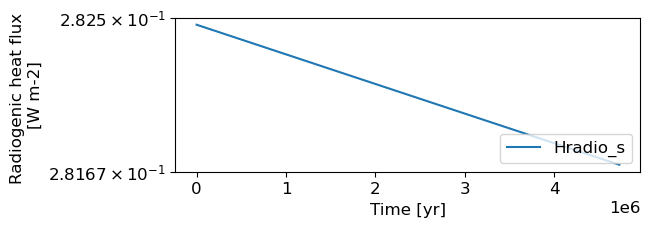

In [8]:
k = "Hradio_s"
y_lbl = "Radiogenic heat flux \n[W m-2]"
y = []
t = []

for i in range(nfiles):
    dat = jsons[i]
    t.append(dat["time"])
    
    # heating 
    H = np.array(dat[k])

    # layer masses 
    m = np.array(dat["mass_s"])

    # layer power dissipated
    P = H * m
    P_tot = np.sum(P)

    # planetary radius and area
    r = float(dat["radius_b"][0])
    A = 4 * np.pi * r * r

    # Flux at this time 
    F_tot = P_tot/A
    y.append(F_tot)

print("Initial flux: %g W m-2"%y[0])

pctdec = (y[-1]-y[0])/y[0]*100
print("Percentage change: %g %%"%pctdec )

fig,ax = plt.subplots(1,1, figsize=(6,2))
ax.plot(t,y, label=k)

ax.set_yscale("symlog")
ax.legend(loc="lower right")
ax.set_xlabel("Time [yr]")
ax.set_ylabel(y_lbl)